In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Breast_Cancer.csv")
data["T Stage"] = data["T Stage "]
data.drop( "T Stage ", axis=1, inplace=True)
data.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,T2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   N Stage                 4024 non-null   object
 4   6th Stage               4024 non-null   object
 5   differentiate           4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
 15  T St

In [4]:
list(data)

['Age',
 'Race',
 'Marital Status',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status',
 'T Stage']

In [5]:
def dropObjectColumns(data):
    for col in data:
        if data[col].dtype == object:
            data = data.drop(col, axis=1)

    return data

def getObjectColumnNames(data):
    objColNames = []
    
    for col in data:
        if data[col].dtype == object:
            objColNames.append(col)

    return objColNames

In [6]:
dropObjectColumns(data).head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50


<Axes: >

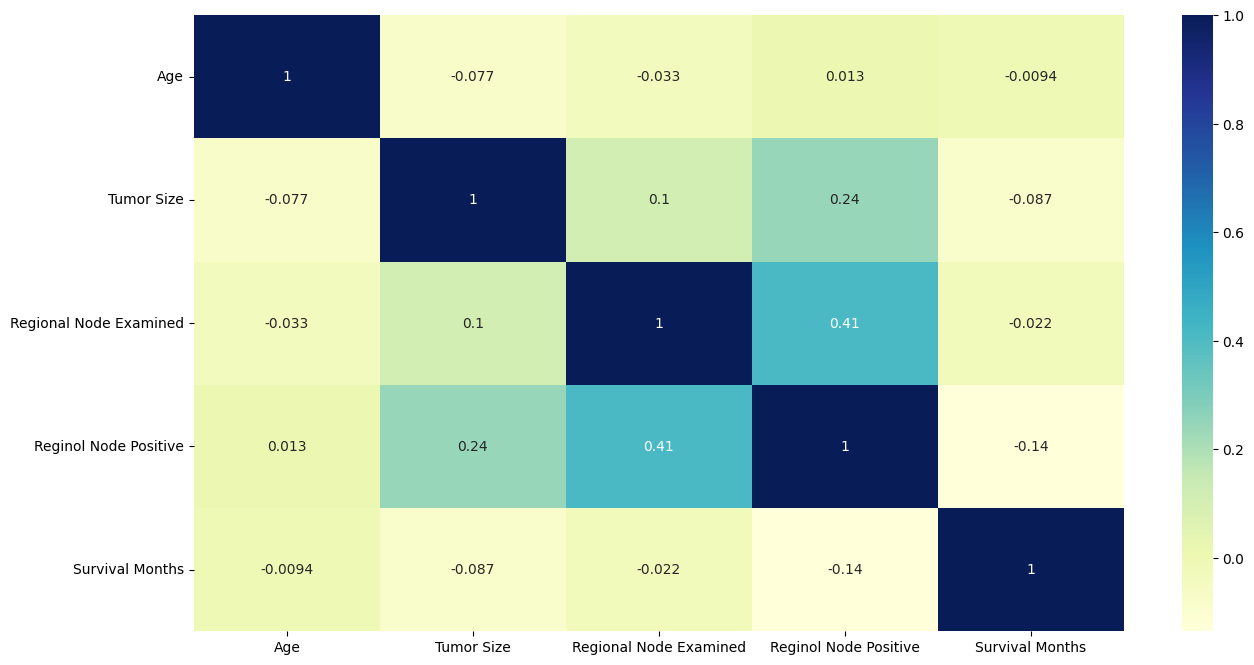

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap( dropObjectColumns(data).corr(), annot=True, cmap="YlGnBu" )

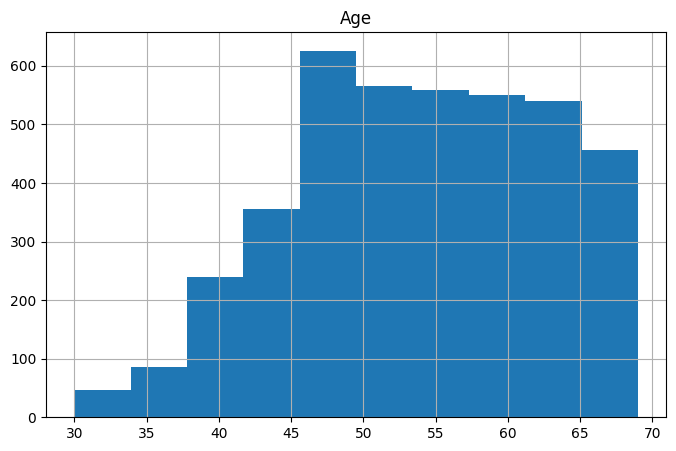

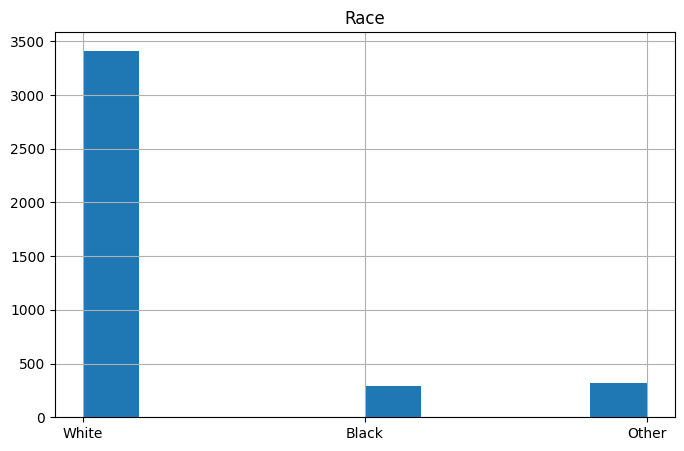

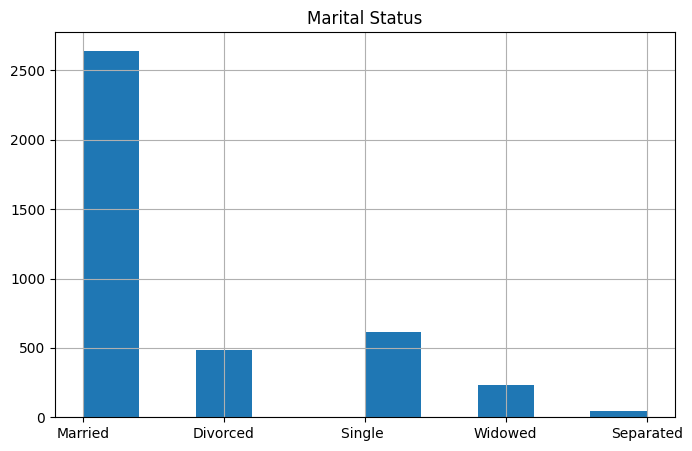

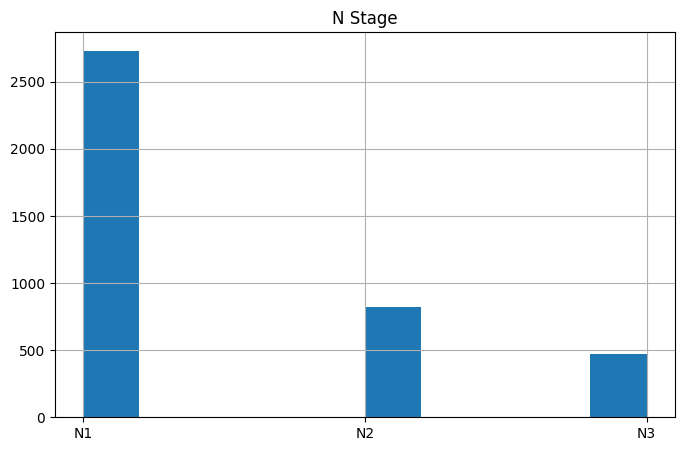

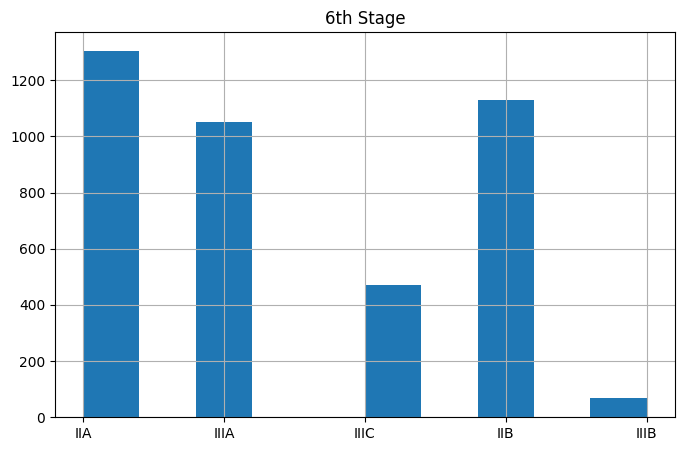

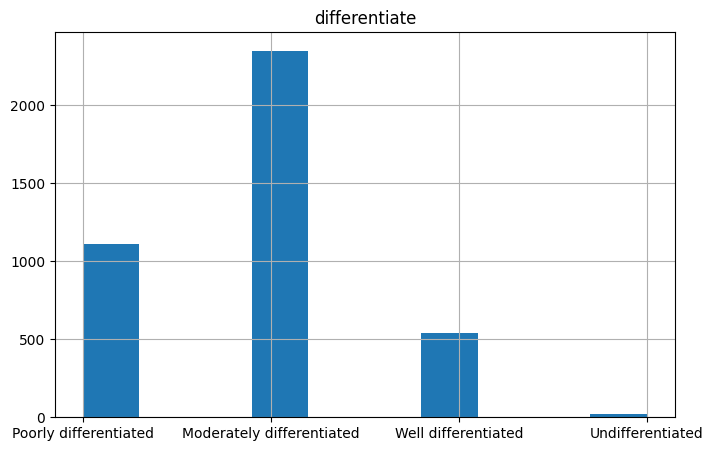

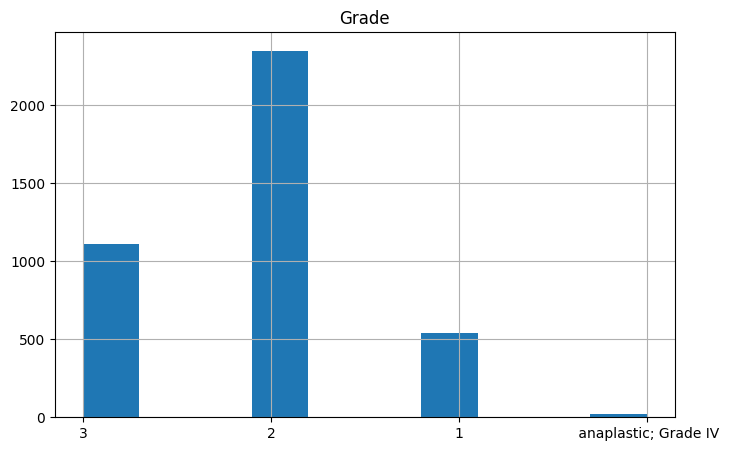

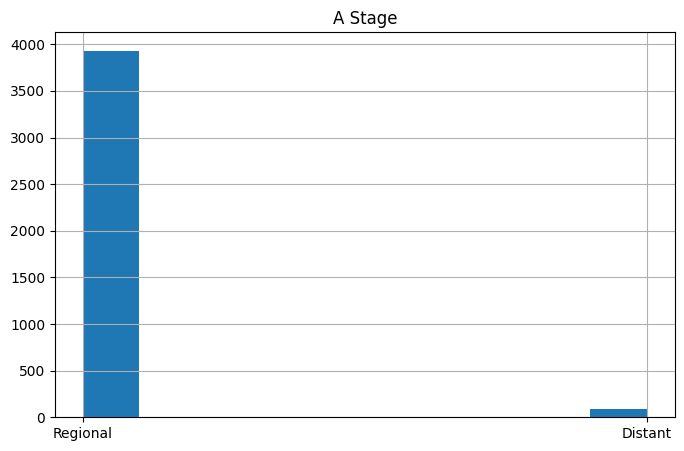

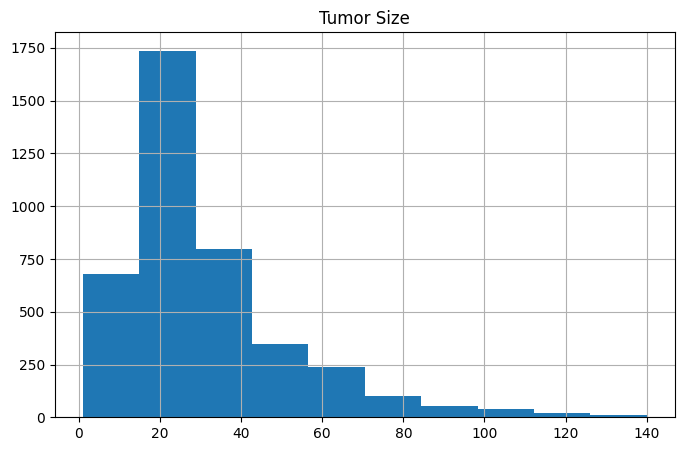

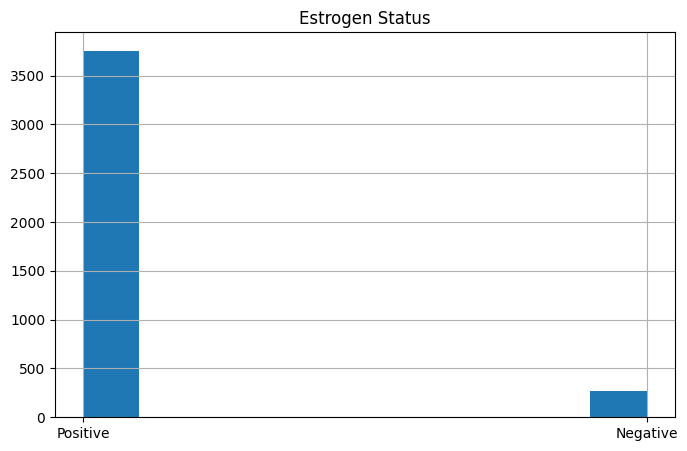

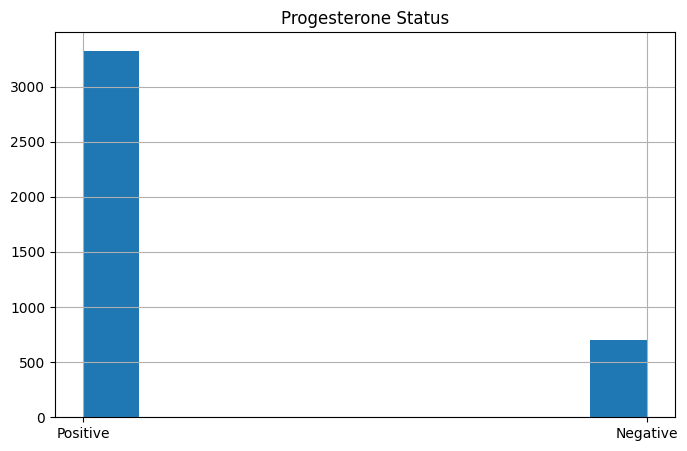

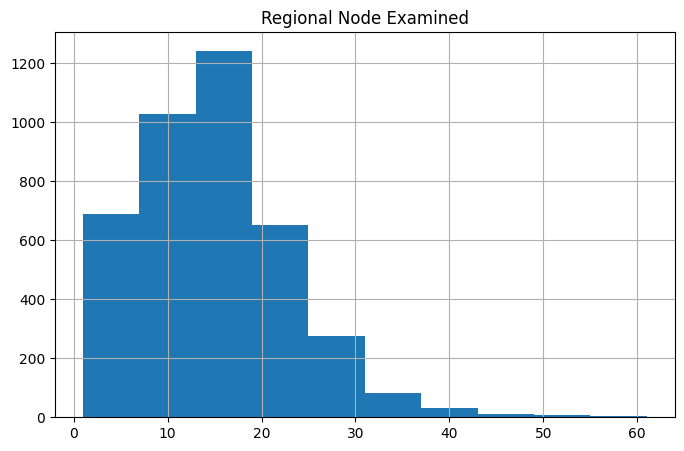

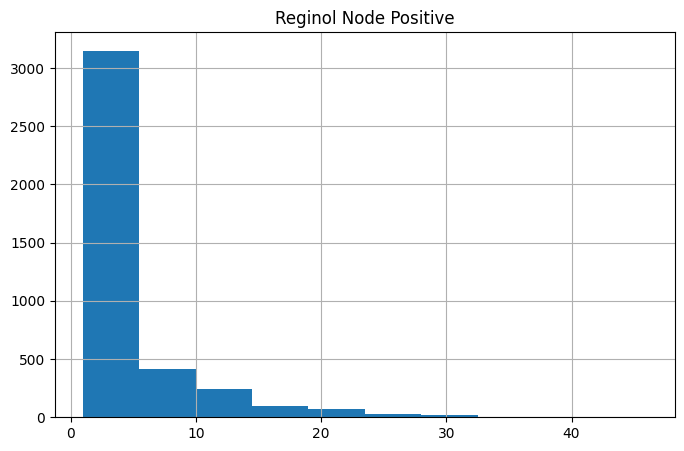

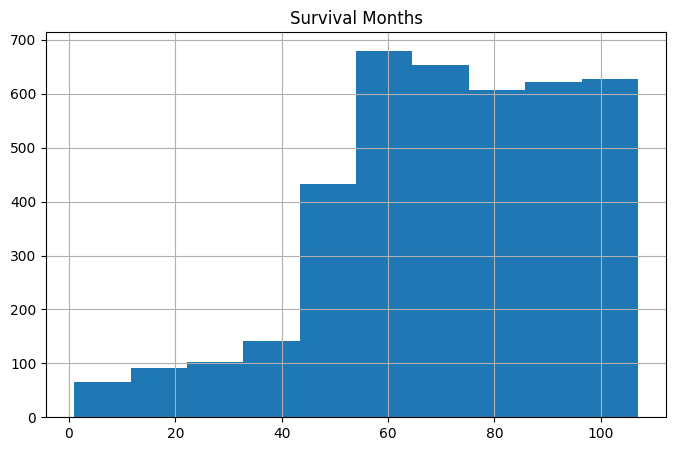

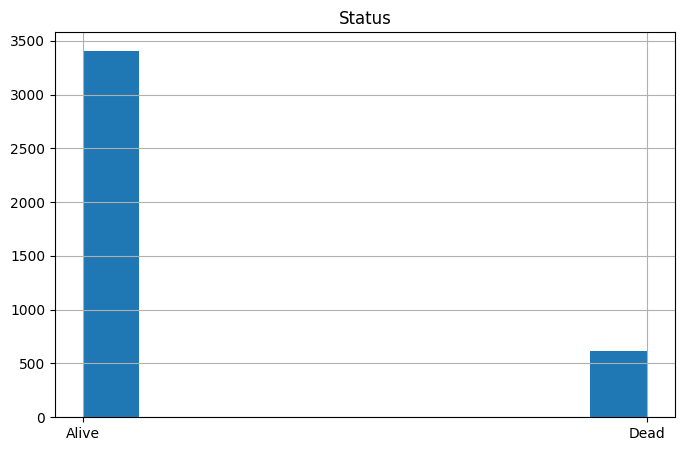

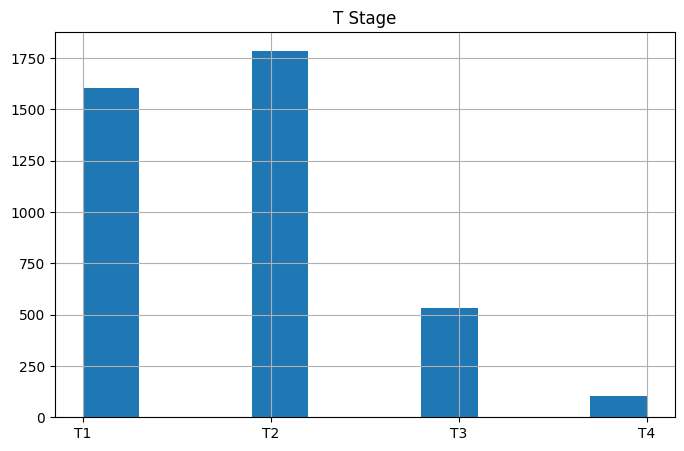

In [8]:
for col in data:
    plt.figure(figsize=(8, 5))
    plt.title(col)
    data[col].hist()

Getting the dummies of the column objects

In [9]:
objColNames = getObjectColumnNames(data)
objColNames.pop(objColNames.index("Status"))

data["Estrogen Status"].replace( {"Positive": "Estrogen Positive", "Negative": "Estrogen Negative"}, inplace=True)
data["Progesterone Status"].replace( {"Positive": "Progesterone Positive", "Negative": "Progesterone Negative"}, inplace=True )
data["Status"].replace( {"Alive": 1, "Dead": 2}, inplace=True )
                
for obj_col in objColNames:
    data = data.join( pd.get_dummies(data[obj_col]) )
    data.drop( obj_col, axis=1, inplace=True )

<Axes: >

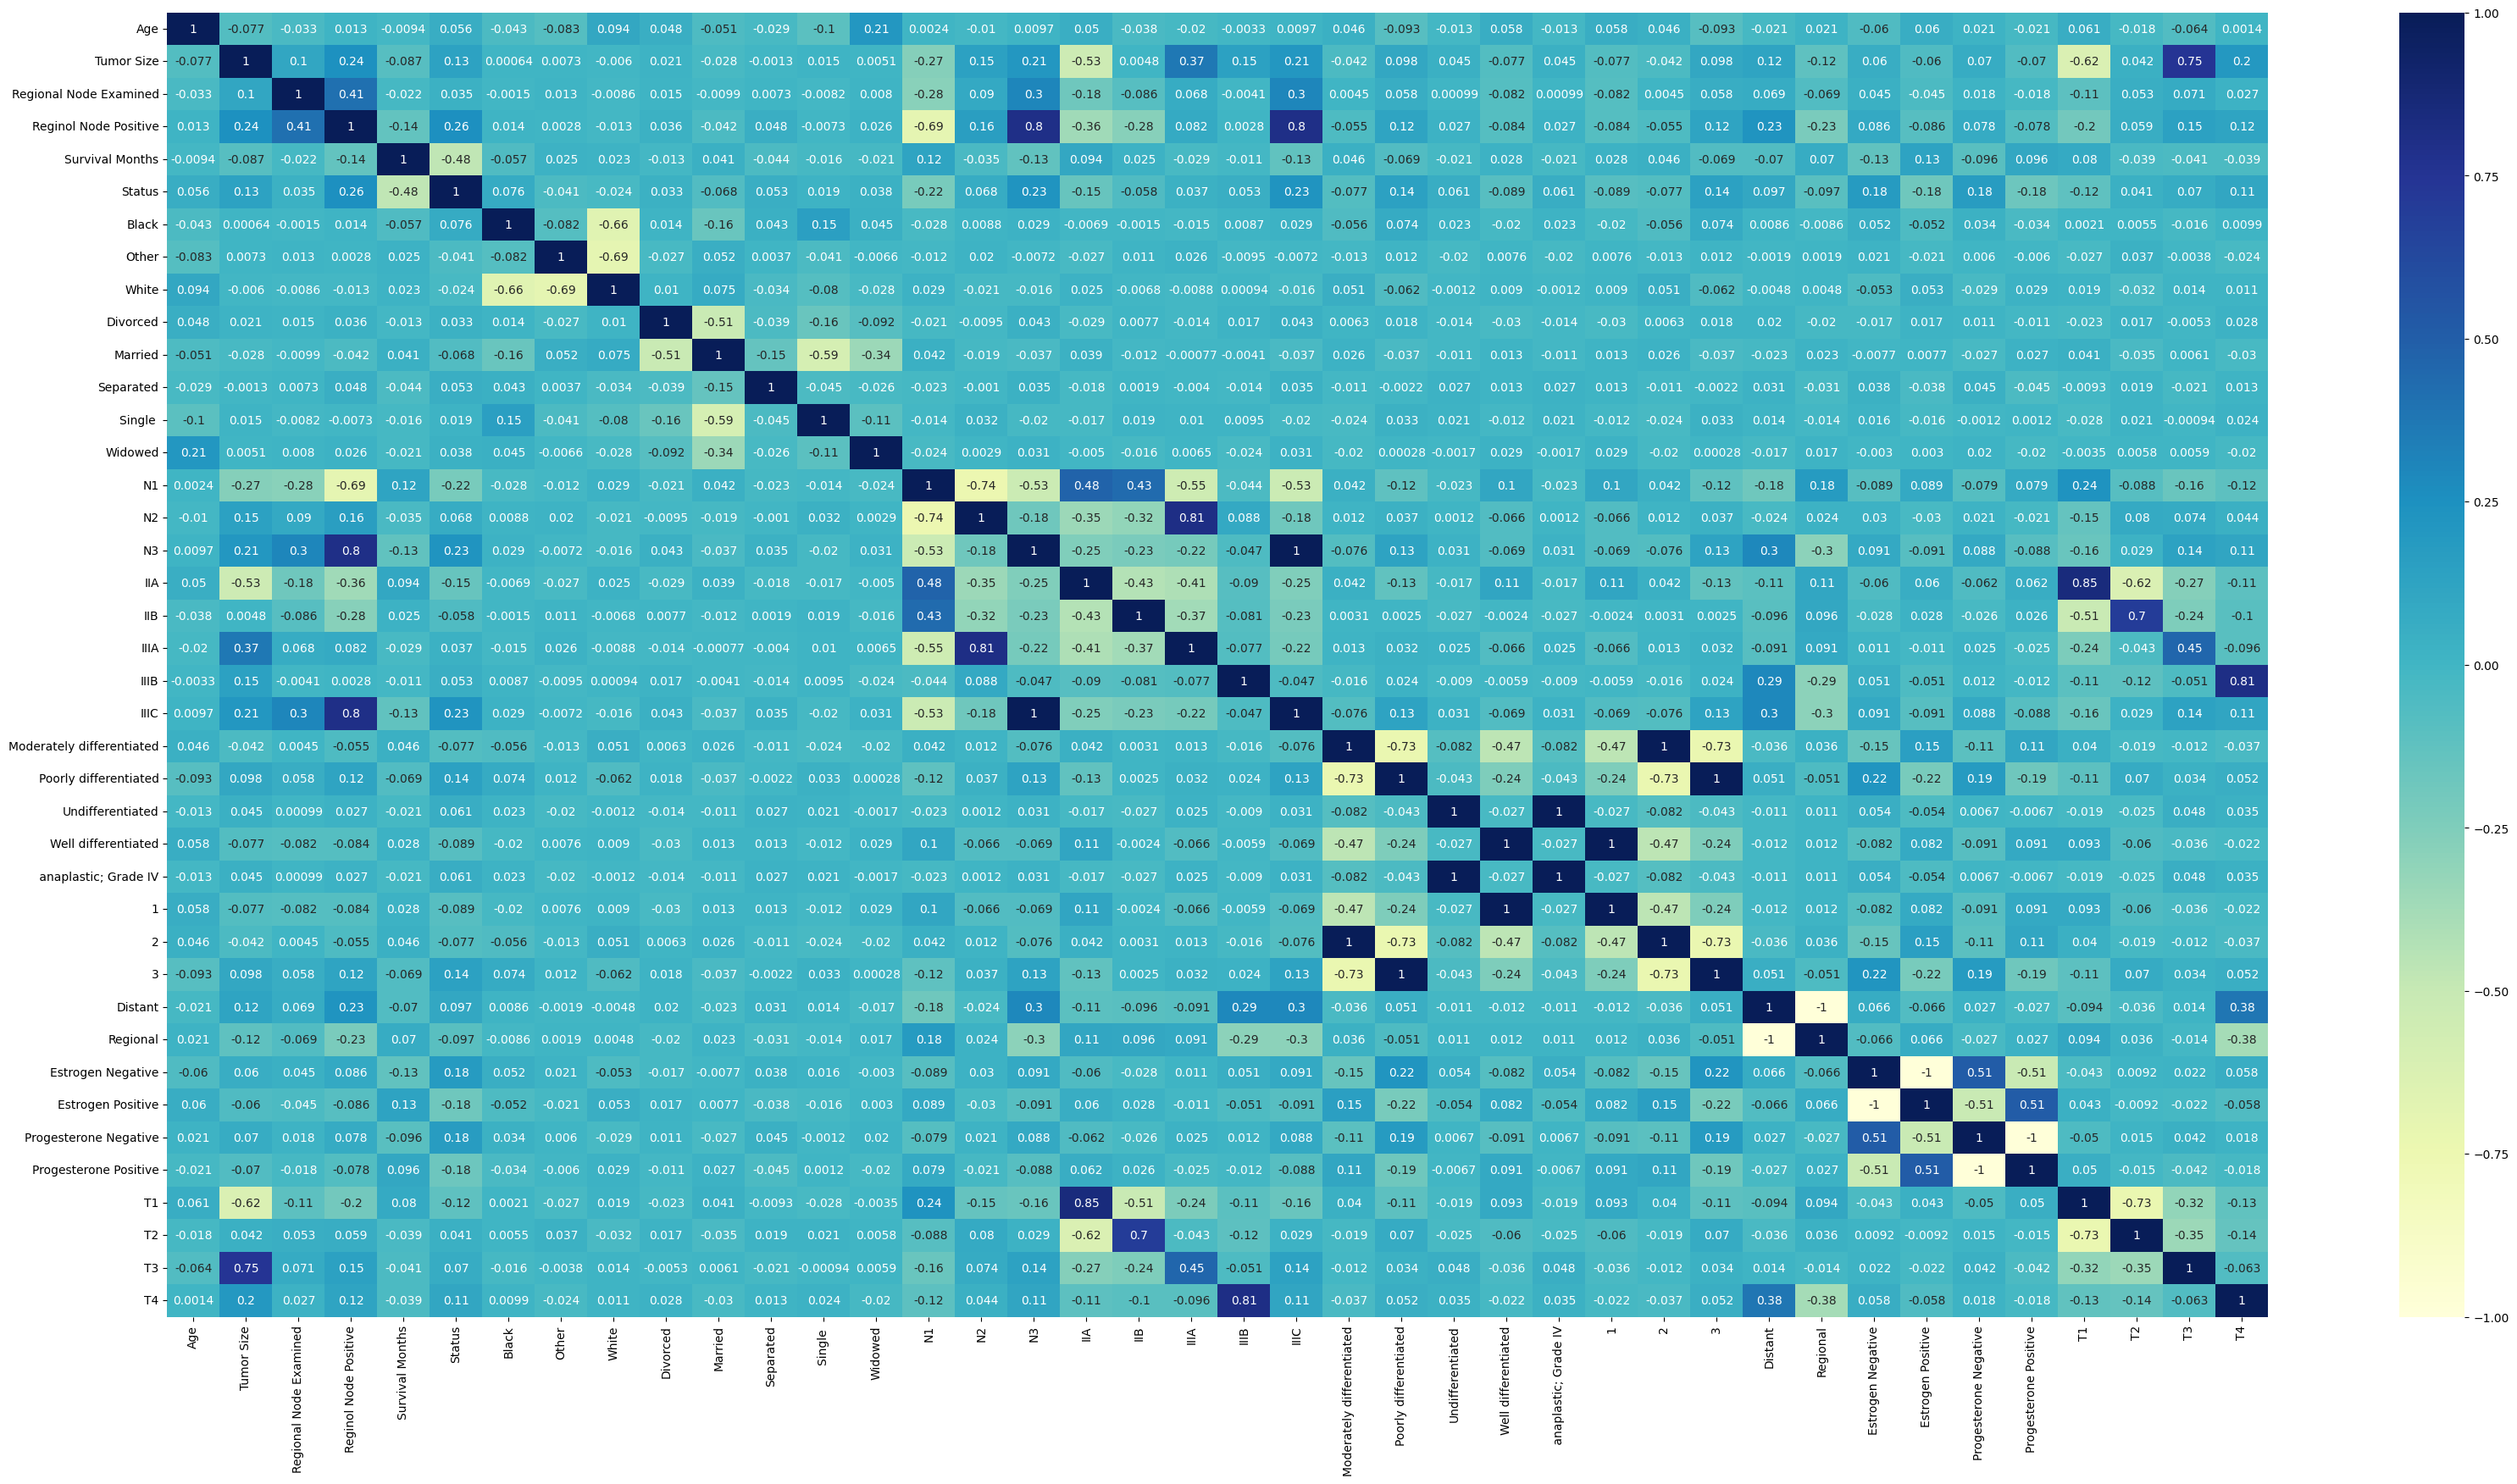

In [10]:
plt.figure(figsize=(40, 20))
sns.heatmap( dropObjectColumns(data).corr(), annot=True, cmap="YlGnBu" )

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop("Status", axis=1)
y = data["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337, test_size=0.2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        4024 non-null   int64
 1   Tumor Size                 4024 non-null   int64
 2   Regional Node Examined     4024 non-null   int64
 3   Reginol Node Positive      4024 non-null   int64
 4   Survival Months            4024 non-null   int64
 5   Status                     4024 non-null   int64
 6   Black                      4024 non-null   bool 
 7   Other                      4024 non-null   bool 
 8   White                      4024 non-null   bool 
 9   Divorced                   4024 non-null   bool 
 10  Married                    4024 non-null   bool 
 11  Separated                  4024 non-null   bool 
 12  Single                     4024 non-null   bool 
 13  Widowed                    4024 non-null   bool 
 14  N1                      

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

forest = RandomForestClassifier()

forest.fit(X_train_s, y_train)

RandomForestClassifier()

In [14]:
forest.score(X_test_s, y_test)

0.9080745341614906

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train_s, y_train)

DecisionTreeClassifier()

In [16]:
dtc.score(X_test_s, y_test)

0.8335403726708075

In [17]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=1100)

In [18]:
param_grid = {
    'penalty': ["l1", "l2", "none"],
    'C': np.logspace(-4, 4, 20),
    'solver': ["newton-cg"],
    'max_iter': [400, 500, 800]
}

In [19]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(lrg, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [20]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, max_iter=400, solver='newton-cg')

In [21]:
best_clf.score(X_test, y_test)

0.9043478260869565

In [22]:
lrg.fit(X_train, y_train)

LogisticRegression(max_iter=1100)

In [23]:
lrg.score(X_test, y_test)

0.9055900621118013